In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"/content/drive/MyDrive/train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory(r"/content/drive/MyDrive/test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 442 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 156s 11s/step - loss: 0.5977 - accuracy: 0.7353 - val_loss: 0.2603 - val_accuracy: 0.9256
Epoch 2/10
14/14 [==============================] - 31s 2s/step - loss: 0.3629 - accuracy: 0.8507 - val_loss: 0.1304 - val_accuracy: 0.9752
Epoch 3/10
14/14 [==============================] - 29s 2s/step - loss: 0.2061 - accuracy: 0.9276 - val_loss: 0.0353 - val_accuracy: 0.9917
Epoch 4/10
14/14 [==============================] - 30s 2s/step - loss: 0.1594 - accuracy: 0.9457 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 29s 2s/step - loss: 0.1493 - accuracy: 0.9434 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 30s 2s/step - loss: 0.1211 - accuracy: 0.9548 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 30s 2s/step - loss: 0.1200 - accuracy: 0.9525 - val_loss: 0.1301 - val_accuracy: 0.9256
Epoch 8/10
14/14 [

In [7]:
model.save("forest1.h5")

In [8]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

4/4 [==============================] - 6s 1s/step


In [9]:
predictions

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],

In [10]:
print(len(predictions))

121


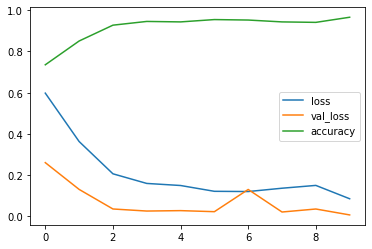

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

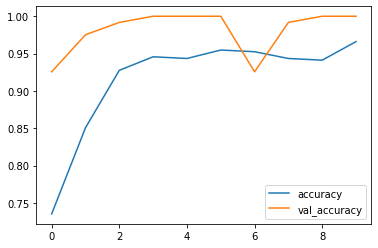

In [12]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [13]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire")
    elif val == 0:
        plt.xlabel("No Fire")

1/1 [==============================] - 0s 147ms/step
[[1.]]


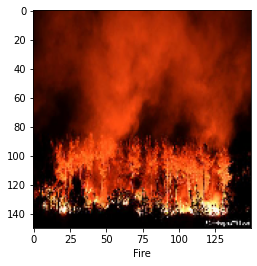

In [14]:
predictImage(r"/content/drive/MyDrive/test_set/with fire/19464620_401.jpg")

1/1 [==============================] - 0s 32ms/step
[[0.]]


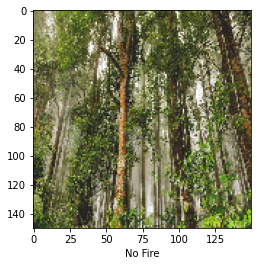

In [15]:
predictImage(r"/content/drive/MyDrive/test_set/forest/091318_LH_forest_loss_main_FREE.jpg")

1/1 [==============================] - 0s 31ms/step
[[1.]]


[[1.0]]

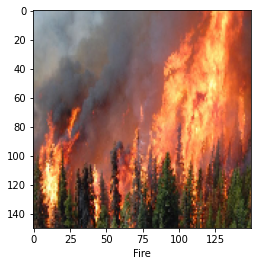

In [16]:
predictImage(r"/content/drive/MyDrive/train_set/with fire/with fire (100).jpg")
[[1.]]

1/1 [==============================] - 0s 31ms/step
[[0.]]


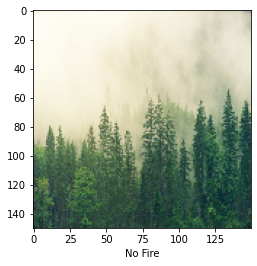

In [17]:
predictImage(r"/content/drive/MyDrive/test_set/forest/cold_daylight_environment_1423600_640x427.jpg")

1/1 [==============================] - 0s 28ms/step
[[1.]]


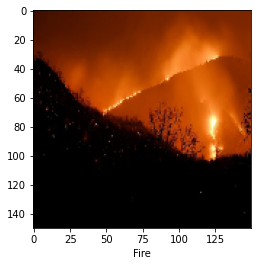

In [18]:
predictImage(r"/content/drive/MyDrive/test_set/with fire/Fire_2_696x392.jpg")

1/1 [==============================] - 0s 80ms/step
[[0.]]


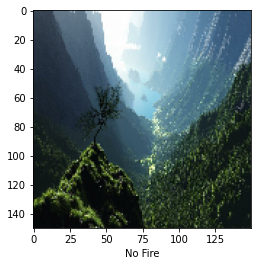

In [19]:
predictImage(r"/content/drive/MyDrive/train_set/forest/with_fire (104).jpg")